# Simulación y Riesgo

Con frecuencia se requiere incorporarla aleatoriedad de forma explícita en los modelos predictivos. Esto se realiza esspecificando distribuciones de probabilidad para las variables de entrada no controlables.

Los modelos con estos elementos se denominan *estocásticos*  o *probabilísticos* y pueden  ayudar a  evaluar los riessgos asociados a consecuencias incontrolables, y permiten encontrar soluciones óptimas bajo incertidumbre.

> **Riesgo** es la probabilidad de que ocurra un resultado no deseado, y puede ser evaluado a  partir de su probabilidad y la gravedad del resultado.

> **El análisis de riesgo** consiste en el desarrollo de una comprensión y una conciencia completas del riesgo asociado con una variable de interés particular.

## Modelo de decisión de tercerización

Se quiere decidir que es más conveniente, si fabricar un artículo, o adquirirlo hecho. Debido al costo fijo, si la demanda es pequeña vale más la pena comprar los productos de un proveedor, a medida que aumenta la demanda llega un punto en que es más conveniente fabricar los productos. Se asume que el volumen de producción es incierto, y que la demanda es una variable aleatoria con distribución de probabilidad normal con $\mu = 1000$ y $\sigma = 10$. 

### Simulación Puntual

Vamos a realizar una simulación para un único valor (aleatorio) de la demanda.

In [1]:
import random

costo_fijo = 50000
costo_variable = 125
volumen_produccion = random.normalvariate(mu=1000, sigma=100)

costo_manufactura = costo_fijo + costo_variable * volumen_produccion
print(f"Costo Manufactura = {costo_manufactura:.2f}")

Costo Manufactura = 195041.72


In [2]:
costo_proveedor = 175
costo_compra = costo_proveedor * volumen_produccion
print(f"Costo Compra = {costo_compra:.2f}")

Costo Compra = 203058.41


In [3]:
diferencia_costo = costo_manufactura - costo_compra
print('Comprar' if diferencia_costo > 0 else 'Fabricar')

Fabricar


El punto de equilibrio, es decir, la producción para la que el costo de manufactura y el costo de compra se igualen, sería:

\begin{equation*}
K + c_v \times p = c_p \times p \\
p = \frac{K}{c_p - c_v}
\end{equation*}


In [4]:
equilibrio = costo_fijo / (costo_proveedor - costo_variable)
print(f"Punto de Equilibrio = {equilibrio:.2f}")

Punto de Equilibrio = 1000.00


Como buen ejemplo de libro, el punto de equilibrio coincide con la media de la demanda.

### Generar una tabla de datos con la simulación

En el caso anterior, obtuvimos el valor para un caso particular. Pero, necesitamos realizar un número de intentos significativos para poder analizar estadísticamente este modelo. Con esta finalidad generamos un conjunto de valores aleatorios de la demanda, y a partir de esta se construye una tabla que nos muestre los resultados de la simulación.

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [6]:
demanda = np.random.normal(loc=1000, scale=100, size=20)
demanda

array([1028.38624878,  831.05960971,  999.88696172, 1028.65595162,
       1038.14048292,  984.15659527,  981.01701455, 1001.38730974,
       1103.19115692,  936.09733487,  951.12325441, 1045.4618419 ,
       1130.66557382,  951.36180987,  846.61063894,  880.40833063,
        958.74859033,  943.10191982, 1022.58221132,  837.50537013])

In [7]:
dif_costo = costo_fijo + (costo_variable - costo_proveedor) * demanda
dif_costo

array([-1.41931244e+03,  8.44701951e+03,  5.65191413e+00, -1.43279758e+03,
       -1.90702415e+03,  7.92170237e+02,  9.49149273e+02, -6.93654872e+01,
       -5.15955785e+03,  3.19513326e+03,  2.44383728e+03, -2.27309210e+03,
       -6.53327869e+03,  2.43190951e+03,  7.66946805e+03,  5.97958347e+03,
        2.06257048e+03,  2.84490401e+03, -1.12911057e+03,  8.12473149e+03])

In [8]:
decision = np.where(dif_costo > 0, 'Comprar', 'Fabricar')
decision

array(['Fabricar', 'Comprar', 'Comprar', 'Fabricar', 'Fabricar',
       'Comprar', 'Comprar', 'Fabricar', 'Fabricar', 'Comprar', 'Comprar',
       'Fabricar', 'Fabricar', 'Comprar', 'Comprar', 'Comprar', 'Comprar',
       'Comprar', 'Fabricar', 'Comprar'], dtype='<U8')

In [9]:
tabla = pd.DataFrame({'demanda': demanda, 'diferencia': dif_costo, 'decision': decision})
tabla

,demanda,diferencia,decision
0,1028.386249,-1419.312439,Fabricar
1,831.059610,8447.019514,Comprar
2,999.886962,5.651914,Comprar
3,1028.655952,-1432.797581,Fabricar
4,1038.140483,-1907.024146,Fabricar
5,984.156595,792.170237,Comprar
6,981.017015,949.149273,Comprar
7,1001.387310,-69.365487,Fabricar
8,1103.191157,-5159.557846,Fabricar
9,936.097335,3195.133256,Comprar


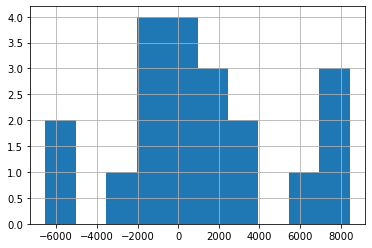

In [10]:
tabla.diferencia.hist()

La gran ventaja de utilizar un DataFrame en lugar de una hoja de cálculo es que podemos realizar sin problema simulaciones para un gran número de intentos. Incluso varias simulaciones.

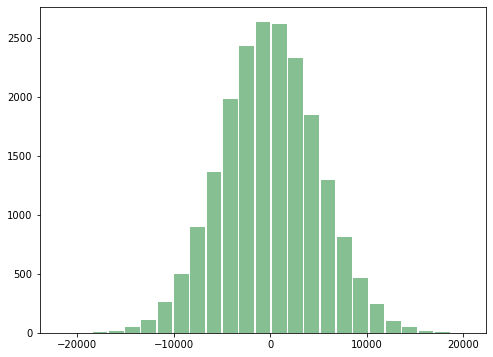

In [11]:
demanda = np.random.normal(loc=1000, scale=100, size=20000)
dif_costo = costo_fijo + (costo_variable - costo_proveedor) * demanda
decision = np.where(dif_costo > 0, 'Comprar', 'Fabricar')
tabla = pd.DataFrame({'demanda': demanda, 'diferencia': dif_costo, 'decision': decision})
tabla.diferencia.hist(bins=25, grid=False, figsize=(8,6), color='#86bf91', zorder=2, rwidth=0.9)

Como era de esperarse, como la diferencia es normal ya que se obtiene de una combinación lineal de la demanda que es normal.

In [12]:
tabla.decision.value_counts()

Fabricar    10089
Comprar      9911
Name: decision, dtype: int64

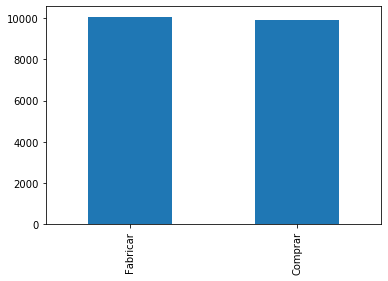

In [13]:
tabla.decision.value_counts().plot(kind='bar')